<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/%ED%9A%8C%EA%B7%80%2C_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.회귀


선형회귀(Linear)는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것

## 2.1 선형회귀


### 최소제곱법 사용하여 회귀선 구하기

a: -0.355834147915461 b: 15.669317743971302


<function matplotlib.pyplot.show>

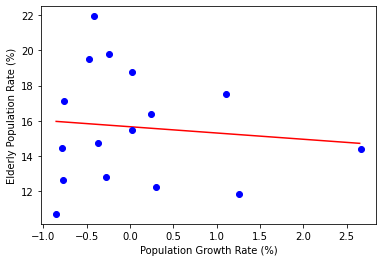

In [ ]:
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, 
     -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 
     12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y 의 평균을 구합니다
x_bar = sum(x) / len(x)
y_bar = sum(y) / len(y)

# 최소제곱법으로 a, b 를 구합니다  (잔차의 제곱을 최소화하는 알고리즘)
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))]) / \
 sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a  * x_bar
print('a:', a,'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x  + b

#붉은색 실선으로 회귀선을 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show

###텐서플로 사용하여 회귀선 구하기

99 a: 0.11074941 b: 6.91883 loss: 86.174225
199 a: -0.12683311 b: 11.365241 loss: 28.262909
299 a: -0.2625511 b: 13.915895 loss: 12.848162
399 a: -0.3248053 b: 15.08607 loss: 10.120193
499 a: -0.3474486 b: 15.511694 loss: 9.805592
599 a: -0.3540012 b: 15.634869 loss: 9.781988
699 a: -0.35551283 b: 15.6632805 loss: 9.780839
799 a: -0.3557894 b: 15.66848 loss: 9.780804
899 a: -0.35582906 b: 15.669228 loss: 9.780804
999 a: -0.35583314 b: 15.669302 loss: 9.780804


<function matplotlib.pyplot.show>

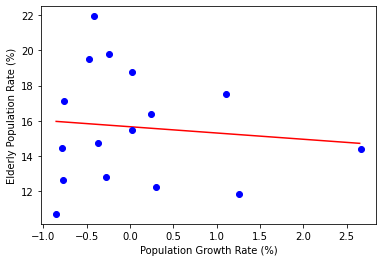

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, 
     -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 
     12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a 와 b 를 랜덤한 값으로 초기화합니다
a = tf.Variable(random.random())
b = tf.Variable(random.random())


# 잔차의 제곱의 평균을 반환하는 함수입니다
def compute_loss() : 
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss


optimizer = tf.keras.optimizers.Adam(lr=0.07) # Adam : SGD와 함께 가장 많이 쓰이는 최적화 함수

# 최적화 함수를 학습시킵니다.
for i in range(1000) :
  # 잔차의 제곱의 평균을 최소화 합니다
  optimizer.minimize(compute_loss, var_list = [a,b])
  
  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())


# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x  + b

#붉은색 실선으로 회귀선을 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show

## 2.2 다항회귀

99 a: 5.374814 b: -7.118199 loss: 179.02768
199 a: 6.8981185 b: -9.909685 loss: 174.18236
299 a: 7.076892 b: -10.23885 loss: 174.1247
399 a: 7.083216 b: -10.250494 loss: 174.12463
499 a: 7.083243 b: -10.250544 loss: 174.12463
599 a: 7.083243 b: -10.250544 loss: 174.12463
699 a: 7.083243 b: -10.250544 loss: 174.12463
799 a: 7.083243 b: -10.250544 loss: 174.12463
899 a: 7.083243 b: -10.250544 loss: 174.12463
999 a: 7.083243 b: -10.250544 loss: 174.12463


<function matplotlib.pyplot.show>

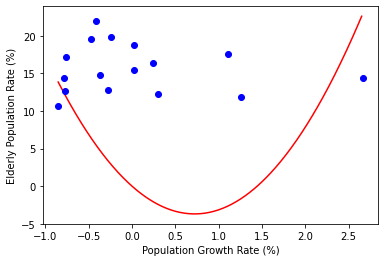

In [ ]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, 
     -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 
     12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a 와 b, c를 랜덤한 값으로 초기화합니다
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다
def compute_loss() : 
  y_pred = a * X*X + b*X + c    # aX^2 + bX + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07) # Adam : SGD와 함께 가장 많이 쓰이는 최적화 함수

# 최적화 함수를 학습시킵니다.
for i in range(1000) :
  # 잔차의 제곱의 평균을 최소화 합니다
  optimizer.minimize(compute_loss, var_list = [a,b])
  
  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())


# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x *line_x + b * line_x + c

#붉은색 실선으로 회귀선을 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show

## 2.3 딥러닝 네트워크를 이용한 회귀

In [ ]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, 
     -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 
     12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 6, activation= 'tanh', input_shape = (1,)),
                             tf.keras.layers.Dense(units = 1)])
# tanh : 하이퍼볼릭 탄젠트 함수

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse' )
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 10회 학습 시키기
model.fit(X,Y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 224ms/step - loss: 258.8816
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 119.2733
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 9.7192
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 9.6221
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5816
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5572
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5386
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5208
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 9.5016
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 9.4797


In [ ]:
# 학습된 딥러닝 네트워크 확인
model.predict(X)

array([[15.901213],
       [15.629948],
       [15.414484],
       [15.921085],
       [15.533545],
       [15.910116],
       [15.886927],
       [15.810919],
       [15.637337],
       [15.849611],
       [15.575123],
       [15.835209],
       [15.879574],
       [15.920809],
       [15.644617],
       [13.781368]], dtype=float32)

<function matplotlib.pyplot.show>

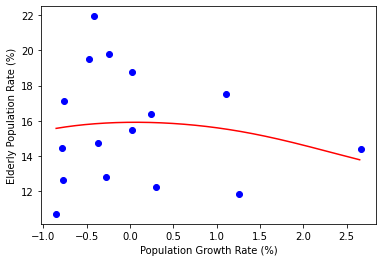

In [ ]:
# 시각화로 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show

## 2.4 보스턴 주택 가격 데이터 세트로 실습

훈련용 데이터와 테스트 데이터 확인

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


데이터의 단위가 다양하므로 전처리해서 정규화 실시

In [ ]:
#데이터 전처리 정규화
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)

train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


정규화된 데이터로 딥러닝 네트워크 학습 시키기

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)), 
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])
# 데이터가 총 13개 속성이라 13개 차원으로

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse' )
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_29 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_30 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X,train_Y, epochs= 25, batch_size = 32, validation_split = 0.25)
# validation_split = 0.25 : 훈련용 데이터의 25%를 검증데이터로 떼서 학습

Epoch 1/25
10/10 [==============================] - 0s 16ms/step - loss: 1.6313 - val_loss: 1.0956
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5902 - val_loss: 0.5331
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4594 - val_loss: 0.4033
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.3431 - val_loss: 0.4020
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2432 - val_loss: 0.3358
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2247 - val_loss: 0.2238
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1996 - val_loss: 0.2083
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1703 - val_loss: 0.2684
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1562 - val_loss: 0.2689
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1648 - val_loss: 0.2080
Epoch 11/25
10/10 

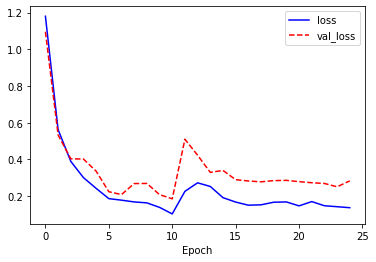

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## 훈련 데이터의 손실은 꾸준히 감소하지만
## 검증 데이터의 손실은 일정히 감소하지 않는다

일단 테스트 데이터로 평가

In [ ]:
model.evaluate(test_X, test_Y)

## 손실이 너무 큼

4/4 [==============================] - 0s 2ms/step - loss: 0.1837


0.183712899684906

과적합 되지 않게 콜백 지정

In [ ]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)), 
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse' )

history = model.fit(train_X,train_Y, epochs= 25, batch_size = 32, 
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')]
                    )

Epoch 1/25
10/10 [==============================] - 1s 35ms/step - loss: 4.0508 - val_loss: 1.3101
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7734 - val_loss: 1.1148
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.7520 - val_loss: 1.0085
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6827 - val_loss: 0.9143
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6114 - val_loss: 0.8279
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4799 - val_loss: 0.8177
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4839 - val_loss: 0.7994
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4774 - val_loss: 0.6648
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4425 - val_loss: 0.6499
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2919 - val_loss: 0.7220
Epoch 11/25
10/10 

조기 학습 중단 된 회귀 모델 결과 시각화

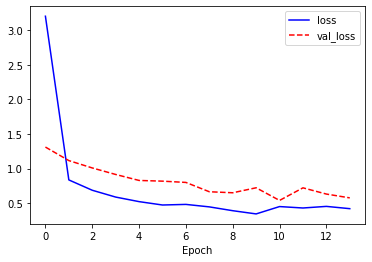

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

조기 학습 중단된 모델 평가

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.3960


0.39604243636131287

# 3.분류


## 3.1 이항분류

### 와인 데이터 세트로 이항 분류 해보기

In [ ]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

레드와인과 화이트와인을 구분 후 두 데이터 프레임을 하나로 합치기

In [ ]:
# 데이터 라벨링
red['type'] = 0
white['type'] = 1

# 데이터 프레임 합치기
wine = pd.concat([red, white])
print(wine.head())
print(wine.tail())

print(wine.info())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70         0.00  ...      9.4        5     0
1            7.8              0.88         0.00  ...      9.8        5     0
2            7.8              0.76         0.04  ...      9.8        5     0
3           11.2              0.28         0.56  ...      9.8        6     0
4            7.4              0.70         0.00  ...      9.4        5     0

[5 rows x 13 columns]
      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
4893            6.2              0.21         0.29  ...     11.2        6     1
4894            6.6              0.32         0.36  ...      9.6        5     1
4895            6.5              0.24         0.19  ...      9.4        6     1
4896            5.5              0.29         0.30  ...     12.8        7     1
4897            6.0              0.21         0.38  ...     11.8        6     1

[5 rows x 13 columns]
<class 'pand

데이터 정규화

In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

데이터 섞은 후 numpy array로 변환

In [ ]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)  # frac : 비율  즉, frac=1 이면 모든 데이터를 뽑아서 섞는 것
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
202        0.256198          0.306667     0.192771  ...  0.231884  0.333333   1.0
208        0.247934          0.326667     0.174699  ...  0.318841  0.333333   1.0
304        0.289256          0.220000     0.144578  ...  0.275362  0.500000   1.0
3877       0.272727          0.133333     0.186747  ...  0.492754  0.333333   1.0
1187       0.231405          0.086667     0.228916  ...  0.449275  0.833333   1.0

[5 rows x 13 columns]
<class 'numpy.ndarray'>
[[0.25619835 0.30666667 0.19277108 0.19325153 0.06810631 0.18055556
  0.52995392 0.19645267 0.37209302 0.15730337 0.23188406 0.33333333
  1.        ]
 [0.24793388 0.32666667 0.1746988  0.02453988 0.05149502 0.04861111
  0.16359447 0.12897629 0.46511628 0.29213483 0.31884058 0.33333333
  1.        ]
 [0.2892562  0.22       0.14457831 0.09509202 0.07973422 0.13888889
  0.36175115 0.15018315 0.37209302 0.10674157 0.27536232 0.5
  1.        ]
 [0.27272727 0.133

훈련용 데이터와 테스트 데이터로 나누기

In [ ]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)  # 80% 데이터만 훈련데이터로 
print(train_idx)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
#12개의 기존 속성은 X, 새로 추가한 type 만 Y

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

5197
[0.25619835 0.30666667 0.19277108 0.19325153 0.06810631 0.18055556
 0.52995392 0.19645267 0.37209302 0.15730337 0.23188406 0.33333333]
1.0
[0.41322314 0.35333333 0.08433735 0.02760736 0.09634551 0.03125
 0.08294931 0.18874108 0.36434109 0.20786517 0.2173913  0.33333333]
0.0


원-핫 인코딩 방식으로 분류

In [ ]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0. 1.]
[1. 0.]


딥러닝 모델 설계

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12,)), 
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2, activation='softmax') 
                             ])
# 분류모델이라 마지막 레이어만 softmax

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 48)                624       
_________________________________________________________________
dense_109 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_110 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_111 (Dense)            (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


분류 모델 학습

In [ ]:
#와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.9273 - val_loss: 0.0562 - val_accuracy: 0.9838
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9792 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9838 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.1044 - val_accuracy: 0.9746
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9798 - val_loss: 0.0394 - val_accuracy: 0.9885
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0317 - val_accuracy: 0.9915
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9904 - val_loss: 0.0530 - val_accuracy: 0.9877
Epoch 

분류 모델 학습 결과 시각화

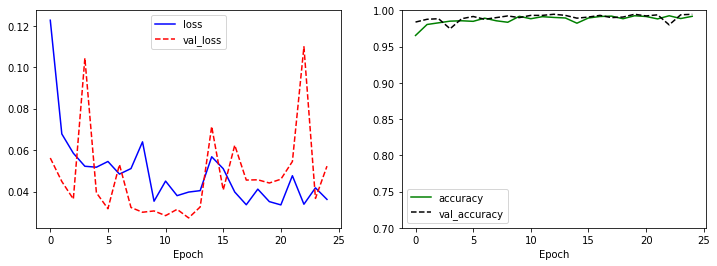

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4)) #시각화 크기 지정

plt.subplot(1,2,1) #시각화 구역을 설정
plt.plot(history.history['loss'], 'b-', label= 'loss')
plt.plot(history.history['val_loss'],'r--', label= 'val_loss')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

분류 모델 평가

In [ ]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 974us/step - loss: 0.0523 - accuracy: 0.9892


[0.05230163410305977, 0.989230751991272]

## 3.2 다항분류

와인 품질 (0 ~ 10)분류

In [ ]:
# 품질을 3 개의 범주(좋음,보통,나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].value_counts())

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


정규화 및 데이터 분리

In [ ]:
del wine['quality']

# 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac = 1) # 랜덤으로 섞기
wine_np = wine_shuffle.to_numpy() #array 전환

train_idx = int(len(wine_np) * 0.8) # 80%만 학습데이터로
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1] # 학습 데이터 X/Y 분할
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1] # 테스트 데이터 X/Y 분할
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3) # 학습 데이터 원 핫 인코딩
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3) # 테스트 데이터 원 핫 인코딩

와인 품질 분류 모델 생성 및 학습

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12,)), 
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 3, activation='softmax') 
                             ])
# 마지막 뉴런 = 3개

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.03),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, 
                    epochs = 25, batch_size = 32, 
                    validation_split = 0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.4975 - accuracy: 0.8177 - val_loss: 0.4514 - val_accuracy: 0.8231
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8163 - val_loss: 0.4298 - val_accuracy: 0.8162
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8190 - val_loss: 0.4054 - val_accuracy: 0.8292
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8081 - val_loss: 0.4111 - val_accuracy: 0.8231
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.7928 - val_loss: 0.4263 - val_accuracy: 0.8246
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8186 - val_loss: 0.4158 - val_accuracy: 0.8031
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8132 - val_loss: 0.4095 - val_accuracy: 0.8031
Epoch 